In [1]:
import seaborn as sns
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
data = Path('output/airline_racism.csv')
df = pd.read_csv(data)
df.head()

,Airline,Language,ParticipatedPercentage,TotalConversations,ParticipatedConversations
0,KLM,ar,3.2258,248,8
1,KLM,de,43.1655,1807,780
2,KLM,en,56.4719,123079,69505
3,KLM,fr,14.7527,2264,334
4,KLM,hi,100.0000,1,1


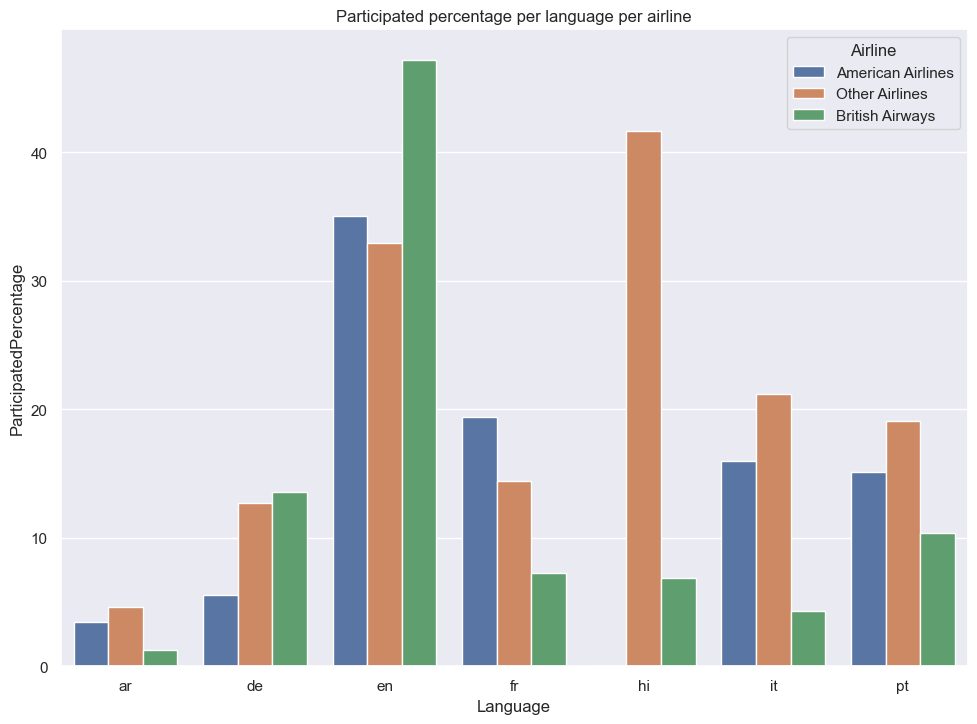

In [3]:
# create grouped barcharts per language, one group for american airlines, one for british airlines, one for other airlines
# the height is the average participated percentage.

# create a dataframe with the average participated percentage per language per airline
df_lang = pd.DataFrame(columns=["Language", "Airline", "ParticipatedPercentage"])

for langauge in df["Language"].unique():
    # get average of participated percentage
    british = df[(df["Language"] == langauge) & (df["Airline"] == "British_Airways")]
    american = df[(df["Language"] == langauge) & (df["Airline"] == "AmericanAir")]
    other = df[(df["Language"] == langauge) & (df["Airline"] != "British_Airways") & (df["Airline"] != "AmericanAir")]
    birtish_mean = british["ParticipatedPercentage"].mean()
    american_mean = american["ParticipatedPercentage"].mean()
    other_mean = other["ParticipatedPercentage"].mean()

    # add to dataframe
    df_lang.loc[len(df_lang.index)] = langauge, "American Airlines", american_mean
    df_lang.loc[len(df_lang.index)] = langauge, "Other Airlines", other_mean
    df_lang.loc[len(df_lang.index)] = langauge, "British Airways", birtish_mean
    
    

# create grouped barchart
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="Language", y="ParticipatedPercentage", hue="Airline", data=df_lang)
ax.set_title("Participated percentage per language per airline")
plt.show()
    